# Chemical and Phase Equilibria

This lecture covers increasingly complex equilibrium problems for gas-liquid phase systems where we consider both chemical and phase equilibrium.

```{note}
This Notebook works through Example Problem 3.4 from *Chemical Reactor Analysis and Design Fundamentals, 2nd ed.* by Rawlings and Ekerdt; the example has been modified slightly with added content to illustrate increasingly complex chemical or phase equilibria.
```

In [1]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plt

## Example Problem 01

Consider the following liquid phase reaction that is occuring at 298K.

$$A \ (l) + B \ (l) \leftrightharpoons C \ (l)$$

In this particular system, $A$ and $C$ are miscible; however, both are insoluble in $B$ (and vice-versa). That is, you have two liquid phases:  one comprised of a mixture of $A$ and $C$ and a second comprised of pure $B$.  You also have a vapor space in the reactor in which $A$, $B$, and $C$ are all present.  You have the following data available to you:

$$K_1 = 1.0 \ \mathrm{at \ 298K \ and \ 1 \ bar}$$  

The liquid phase comprised of a mixture of $A$ and $C$ is strongly nonideal. Activity coefficients for this system can be calculated as a function of composition ($x_j$) using the Margules Equation:

\begin{align*}
    \ln \gamma_A &= x_C^2 \left[A_{AC}+2(A_{CA}-A_{AC})x_A \right] \\
    \ln \gamma_C &= x_A^2 \left[A_{CA}+2(A_{AC}-A_{CA})x_C \right] \\
\end{align*}

Margules Constants are:

\begin{align*}
    A_{AC} = 1.4 \\
    A_{CA} = 2.0 \\
\end{align*}

The vapor pressures of each component at 298K are additionally given:

\begin{align*}
    P_A^\circ = 0.65 \ \textrm{bar} \\
    P_B^\circ = 0.50 \ \textrm{bar} \\
    P_C^\circ = 0.50 \ \textrm{bar} \\
\end{align*}

With this information in hand, calculate the equilibrium composition of each phase in this system.

Before we start with the solution, the cell below defines fixed parameters as global workspace variables.  We also illustrate the variations in activity coefficient as a function of phase composition using the Margules model provided in the problem statement.

In [3]:
###############################################################
# Defining a few fixed parameters in the workspace            #
###############################################################
AAC    = 1.4
ACA    = 2.0
K01    = 1.0
PASAT  = 0.65 #bar
PBSAT  = 0.50 #bar
PCSAT  = 0.50 #bar

################################################################
# Define functions to calculate activity coefficients          #
################################################################
γA = lambda xA, xC: np.exp(xC**2*(AAC + 2*(ACA - AAC)*xA))
γC = lambda xA, xC: np.exp(xA**2*(ACA + 2*(AAC - ACA)*xC))

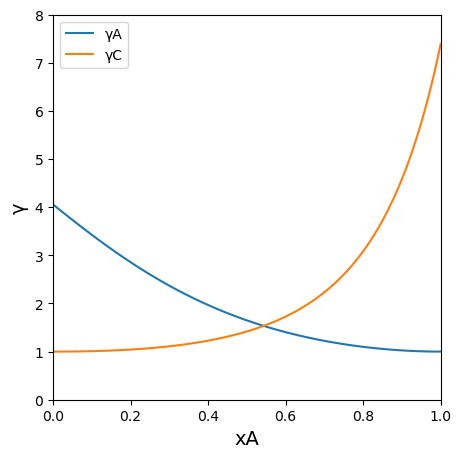

In [4]:
################################################################
# Illustration of activity coefficient behavior vs. xA         #
################################################################

xAspan = np.linspace(0, 1, 100) #vary mole fraction of A from 0 to 1
xCspan = 1 - xAspan # Composition tie, we know that xA + xC = 1.0

#create a plot of activity coefficients
plt.figure(figsize = (5, 5))
plt.plot(xAspan, γA(xAspan, xCspan), label = 'γA')
plt.plot(xAspan, γC(xAspan, xCspan), label = 'γC')
plt.xlim(0, 1)
plt.ylim(0, 8)
plt.xlabel('xA', fontsize = 14)
plt.ylabel('γ', fontsize = 14)
plt.legend(loc = 'upper left')
plt.show()

### Solution to Example Problem 01

#### Gibbs Phase Rule

At first glance, this problem seems underspecified. One is tempted to assign a basis (because this is what we usually do for equilibrium problems) or possibly assume a pressure; however, we are not able to do this in this particular problem because there are no degrees of freedom.  For a formal assessment, consider the Gibbs Phase Rule:

$$F = 2 - \pi + N - R$$

Where $F$ is the degrees of freedom, $\pi$ is the number of phases present, $N$ is the number of species present, and $R$ is the number of reactions occuring.  Substituting relevant quantities for this system, we find:

$$F = 2 - 3 + 3 - 1 = 1 \ \textrm{Degree of Freedom}$$

This means we can specify one thing: Temperature, pressure, or starting composition.  After we make that specification, the system can be fully solved in terms of $(T, P, X_j)$.  Here, we are given an operating temperature, $T = 298K$. This means we cannot assign a basis/composition nor can we arbitrarily specify a pressure. The system is fully specified with just temperature, so we'll have to work with that! We generally start with the relationship between thermodynamics and composition at equilibrium:

$$\exp\left(\frac{-{\Delta G}^\circ_1}{RT}\right) = K_1 = \prod_{j = 1}^{N_S}a_j^{\nu_{1,j}} $$

Here, we are given the relevant value of the equilibrium constant at reaction temperature ($T = 298K$), $P = 1 \mathrm{bar}, and for species as pure liquids:

$$K_1 = 1.0 $$

We will note that solving the chemical equilibrium equation above only tells us about the composition of species in the phases specified in the reaction. To get information about other phases, we have to solve the phase equilibrium problem, but we'll get to that second.

### The Chemical Equilibrium Problem (liquid phase)

We can address the composition and pressure dependencies on the right hand side of the chemical equilibrium equation by expanding:

$$ K_1 = \prod_{j = 1}^{N_S}a_j^{\nu_{1,j}}$$

This gives:

$$ K_1 = \frac{a_C}{a_A a_B}$$

Thermodynamic activities are given by:

$$a_j = \frac{\hat{f}_j}{f_j^\circ}$$

The reacting species here are all liquids.  When we work with liquids, our reference state is a pure liquid at the reaction temperature (here, 298K) and a pressure of 1 bar.  Fugacities for liquids in a mixture are generally given by the following equation, which assumes saturation pressures are not very high and that the Poynting correction is $\approx$ 1:

$$\hat{f}_j = \gamma_j x_j P_j^\textrm{sat}$$ 

In the reference state (pure species), we find:

$$f_j^\circ = P_j^\textrm{sat}$$

Thus, for liquids in this system, we have:

$$a_j = \gamma_j x_j$$

We have three liquids to consider: $A$, $B$, and $C$.  $A$ and $C$ exist together as a solution; $B$ is present as a separate, pure phase.  $A$ and $C$ therefore have nonideal phase behavior that depends on composition, and we are given Margules parameters to account for this. We have develped the functions to model activity coefficients as a function of composition (above), and we can use these as needed. Since $B$ is present as a pure phase, it is present in its reference state, which is thermodynamically ideal.  So, we find:

\begin{align}
    a_A &= \gamma_A x_A \\
    a_B &= 1.0 \\
    a_C &= \gamma_C x_C \\
\end{align}

Both activity coefficients, $\gamma_A$ and $\gamma_C$ are defined using the Margules models that we defined as functions of $x_A$ and $x_C$ above. A quick inspection of the Margules equations reveals that they are only functions of fixed parameters ($A_{i,j}$) and the mole fractions of $A$ and $C$; therefore, this does not add additional unknowns. Taking score, then, we find we have one equation to solve:

$$0 = K_1 - \frac{a_C}{a_A a_B} $$

It is a function of two unknowns:  $x_A$ and $x_C$ (remember, $B$ is in a pure phase so $x_B = a_B = 1$). We can relate these with a composition tie:

$$0 = 1 - x_A - x_C $$

So the following two equations can be solved simultaneously to determine the composition of the liquid phase:

### System of Equations for Liquid phase only

\begin{align}
    0 &= K_1 - \frac{a_C}{a_A a_B} \\
    0 &= 1 - x_A - x_C
\end{align}

Unknowns: $x_A$, and $x_C$

```{note}
I could easily convert this into a univariate problem by defining $x_C = 1 - x_A$. This would then be solved by hand or using `opt.newton()`. Instead, I have ***chosen*** to formulate this as a multivariate problem, retain both mole fractions as unknowns, and solve using `opt.root()`. Technically, reducing the problem to a single unknown is probably the better approach; however, when we add in the phase equilibrium part, we will inevitably have to deal with a multivariate system of equations, and I wanted to avoid changing the approach and algorithm used mid-solution.

For completeness, the alternative univariate formulation is also shown. I believe that comparing the two codes helps to build a good understanding of differences between the approaches, as picking the correct strategy can seem cryptic and confusing when you are first learning this. It is nice to be reminded that there are usually several ways to solve any problem once you are writing scripts. Sometimes it is clear that one is better than the other, but that doesn't necessarily mean that alternative approaches are wrong.
```

In [5]:
#################################################################################################################
# This objective function specifies the equations needed to solve the liquid phase chemical equilibrium problem #
#################################################################################################################

def P01a(var):
    
    #Liquid mole fractions
    xA = var[0]
    xB = 1
    xC = var[1]
    
    #Activity Coefficients are calculated using γA(xA, xC) and γC(xA, xC)
    
    #Thermodynamic activities
    aA     = γA(xA, xC)*xA
    aB     = 1.0
    aC     = γC(xA, xC)*xC

    #Kthermo is defined as K01 in the workspace
    
    #KA's
    KA     = aC/aA/aB
  
    #Objective
    LHS1   = K01 - KA
    LHS2   = 1.0 - xA - xC
    
    return [LHS1, LHS2]

In [6]:
###############################################################
# Solve the chemical equilibrium problem using opt.root()     #
###############################################################

var0 = [0.3, 0.7]
ans = opt.root(P01a, var0)
ans

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  0.000e+00]
       x: [ 3.497e-01  6.503e-01]
  method: hybr
    nfev: 11
    fjac: [[-9.456e-01  3.253e-01]
           [-3.253e-01 -9.456e-01]]
       r: [-3.074e+00 -1.619e+00  5.005e-01]
     qtf: [ 8.750e-11  3.010e-11]

In [ ]:
##############################################################################
# Formulating the equilibrium problem as a univariate objective function     #
##############################################################################

def P01_univariate(xA):
    
    # Liquid mole fractions
    # xA is passed as the function argument
    xB = 1
    xC = 1 - xA
    
    #Activity Coefficients are calculated using γA(xA, xC) and γC(xA, xC)
    
    #Thermodynamic activities
    aA     = γA(xA, xC)*xA
    aB     = 1.0
    aC     = γC(xA, xC)*xC

    #Kthermo is defined as K01 in the workspace
    
    #KA's
    KA     = aC/aA/aB
  
    #Objective
    LHS1   = K01 - KA
        
    return LHS1

In [9]:
############################################################
# Solving the univariate problem using opt.root()          #
############################################################

xAsol = opt.newton(P01_univariate, 0.3)
xCsol = 1 - xAsol
print(f'At chemical equilibrium, xA = {xAsol:4.2f} and xC = {xCsol:4.2f}')

At chemical equilibrium, xA = 0.35 and xC = 0.65


### The Phase Equilibrium Problem (VLE)

Unfortunately, the liquid phase composition is not everything the problem requested. We also have a vapor phase present in the reactor, which contains all species: $A$, $B$, and $C$.  We also need to determine the composition of the vapor phase! We will do this by considering that this system is at full equilibrium (chemical equilibrium *and* phase equilibrium). The criteria for phase equilibrium is that every species, $j$, is present at the same chemical potential, $\mu_j$, in each phase that is present at equilibrium. A consequence of equal chemical potential of species $j$ in the two equilibrated phases is that the fugacity of species $j$ is equal in each phase. Here we have a vapor phase containing all three species, one liquid phase containing $A$ and $C$, and second liquid phase containing only $B$. With that insight, we can write three phase equilibrium constraint equations $(\hat{f}_{j,L} = \hat{f}_{j,V})$, one for each species. 

 We recall that we express fugacities for species in the liquid phase as:

$$\hat{f}_{j,L} = \gamma_j x_j P_j^\textrm{sat}$$

And for species in the vapor phase as:

$$\hat{f}_{j,V} = y_j \phi_j P$$

Looking at the saturation pressures of these species, they are all relatively small, so we can assume the pressure in the tank will not be all that high, and we can set $\phi_j = 1.0$ to simplify the problem.  This gives the following three equations that describe phase equilibria:

\begin{align*}
    y_A P &= \gamma_A x_A P_A^\textrm{sat}\\
    y_B P &= P_B^\textrm{sat}\\
    y_C P &= \gamma_C x_C P_C^\textrm{sat}\\
\end{align*}

So we have to add these three equations to our 2 equations/2 unknowns situation that describes the liquid phase.  The only catch is that these three equations are expressed in terms of 4 new unknowns: $y_A$, $y_B$, $y_C$, and $P$.  So we need one more equation that constrains the system.  We can use another composition tie for the gas phase, specifically:

$$1 = y_A + y_B + y_C$$

With that, we have a perfectly specified problem (6 equations, 6 unknowns), and we can solve with `scipy.optimize.root()`.

### System of equations for simultaneous chemical and phase equilibrium

\begin{align*}
    0 &= K_1 - \frac{a_C}{a_A a_B} \\
    0 &= 1.0 - x_A - x_C \\
    0 &= y_A P - \gamma_A x_A P_A^\textrm{sat} \\
    0 &= y_B P - P_B^\textrm{sat} \\
    0 &= y_C P - \gamma_C x_C P_C^\textrm{sat} \\
    0 &= 1.0 - y_A - y_B - y_C \\
\end{align*}

Unknowns:  $x_A$, $x_C$, $y_A$, $y_B$, $y_C$, $P$ 

We write this system as an objective function below.  Just notice that every single definition we make in the function below is either something that is fixed and given in the problem statement, or it is a function of any combination of these 6 unknowns.  Hence, I call this one a system of 6 equations written in terms of 6 unknowns. One might further notice that, at this point, it is difficult (if not impossible) to reduce unknowns and solve this as a univariate problem, so `opt.root()` is probably the best choice for an algebraic solver here.

In [10]:
############################################################################################################################### 
# Construct an objective function containing the system of equations describing chemical and phase equilibria in this system  #
###############################################################################################################################

def P01b(var):
    
    #Liquid mole fractions
    xA = var[0]
    xB = 1
    xC = var[1]
    yA = var[2]
    yB = var[3]
    yC = var[4]
    P  = var[5]

    #Saturation pressures are defined as globals in the workspace
    
    #Thermodynamic activities
    aA     = γA(xA, xC)*xA
    aB     = 1.0
    aC     = γC(xA, xC)*xC
    
    #KA's
    KA     = aC/aA/aB
    
    #KThermo is defined as K01 in the workspace
        
    #Objective
    LHS1   = K01 - KA
    LHS2   = 1.0 - xA - xC
    LHS3   = yA*P - γA(xA, xC)*xA*PASAT
    LHS4   = yB*P - PBSAT
    LHS5   = yC*P - γC(xA, xC)*xC*PCSAT
    LHS6   = 1.0 - yA - yB - yC
    
    return [LHS1, LHS2, LHS3, LHS4, LHS5, LHS6]

In [12]:
#################################################################
# Solve the system of equations and print results to screen     #
#################################################################

var0 = [0.3, 0.7, 1/3, 1/3, 1/3, 1]
ans = opt.root(P01b, var0)
xA, xC, yA, yB, yC, P = ans.x

print(ans.message)
print(f'The gas phase mole fractions of A, B, and C are {yA:0.3f}, {yB:0.3f}, {yC:0.3f}')
print(f'The liquid phase mole fractions of A and C are {xA:0.3f} and {xC:0.3f}')
print(f'The system pressure is {P:0.3f} bar')

The solution converged.
The gas phase mole fractions of A, B, and C are 0.359, 0.365, 0.276
The liquid phase mole fractions of A and C are 0.350 and 0.650
The system pressure is 1.368 bar


## Example Problem 02

Adding complexity to Example 2 above, we learn that that species $A$ decomposes in a side reaction to form species $D$. So now we have two reactions occuring in this system:

\begin{align*}
    &(1) \qquad A \ (l) + B \ (l) \leftrightharpoons C \ (l) \\
    &(2) \qquad A \ (l) \leftrightharpoons 2D \ (g) \\
\end{align*}

In addition to the data provided for Reaction 1 in Example Problem 01, thermodynamic data is also available for the 2nd reaction occurring as written, i.e., $A$ in a pure liquid reference state decomposes to form $D$ in a pure gas reference state. Specifically, we know that, at $T = 298K$ and $P = 1 \mathrm{bar}$:

$$K_2 = 3.7$$

Species $D$ is non-condensable, and it is insoluble in both liquid phases that are present.  This means that species $D$ is only present in the gas phase. Calculate the equilibrium composition of each phase in this system, which is at $T=298K$ and $P = 1 \mathrm{bar}$.

### Solution to Example Problem 02

This basically adds one additional unknown to our system, the gas-phase mole fraction of species $D$, $y_D$.  There is no species $D$ in the liquid phase. We only need to add one equation to the last case to solve for this -- that will be the chemical equilibrium specification for reaction 2:

$$\exp\left(\frac{-{\Delta G}^\circ_2}{RT}\right) = K_2 = \prod_{j = 1}^{N_S}a_j^{\nu_{2,j}}$$

We are already given $K_2$ at the appropriate temperature and pressure, so we focus on the right hand side to find:

$$K_2 = \frac{a_D^2}{a_A}$$

As usual:

$$a_j = \frac{\hat{f}_j}{f_j^\circ}$$

Here, we see mixed reference states in reaction 2.  Thermodynamic data is provided for the reaction as written, which means for species $A$ as a pure liquid and for species $B$ as a pure gas.  So we use different activity definitions for each.  We just have to make sure our reference states in the activity definitions are exactly the same as those used in defining the equilibrium constant.  For the gas (species $D$), we have:

$$a_D = \frac{y_D \phi_D P}{P^\circ}$$

But we already know the pressure of the system is not too high, so we say that the fugacity coefficient for species $D$ is 1, giving:

$$a_D = \frac{y_D P}{P^\circ}$$

For species $A$, we actually already defined the activity in the solution for the first part of this problem:

$$a_A = \gamma_A x_A$$

With that, we're all set.  Here's the system of equations we now have to solve:

#### Equations for chemical/phase equilibria with multiple reactions and reference states

\begin{align*}
    0 &= K_1 - \frac{a_C}{a_A a_B} \\
    0 &= 1.0 - x_A - x_C \\
    0 &= y_A P - \gamma_A x_A P_A^\textrm{sat} \\
    0 &= y_B P - P_B^\textrm{sat} \\
    0 &= y_C P - \gamma_C x_C P_C^\textrm{sat} \\
    0 &= 1.0 - y_A - y_B - y_C - y_D \\
    0 &= K_2 - \frac{a_D^2}{a_A} \\
\end{align*}

Unknowns:  $x_A$, $x_C$, $y_A$, $y_B$, $y_C$, $y_D$, $P$ 

We write this system as an objective function below.  Again, notice that every single definition in this objective function is either a value that is constant (e.g., saturation pressures), or it is a function of our unknowns.  With that in mind, this is 7 constraint equations, 7 unknowns, and we can solve it with `opt.root()`. We'll just modify the objective function from about to expand the number of unknowns and constraint equations.

In [13]:
################################################################
# New globals for Example Problem 02                           #
################################################################
K02    = 3.7
P0     = 1.0 #bar

In [ ]:
#################################################################################################
# Construct objective function with 2nd chemical equilibrium constraint added                   #
#################################################################################################

def P02(var):
    
    #Liquid mole fractions
    xA = var[0]
    xB = 1
    xC = var[1]
    yA = var[2]
    yB = var[3]
    yC = var[4]
    yD = var[5]
    P  = var[6]
    
    #Reference pressure is defined in workspace
    #Saturation pressures are defined in workspace
    #Activity Coefficients are defined using functions
    
    #Thermodynamic activities; A, B, and C as liquids
    aA     = γA(xA, xC)*xA
    aB     = 1.0
    aC     = γC(xA, xC)*xC
    
    #Thermodyanmic activities; D as a gas
    aD    = yD*P/P0
    
    #KA's
    KA1    = aC/aA/aB
    KA2    = aD**2/aA
    
    #KThermo values are defined in workspace for both reactions
    
    #Objective
    LHS1   = K01 - KA1
    LHS2   = 1.0 - xA - xC
    LHS3   = yA*P - γA(xA,xC)*xA*PASAT
    LHS4   = yB*P - PBSAT
    LHS5   = yC*P - γC(xA, xC)*xC*PCSAT
    LHS6   = 1.0 - yA - yB - yC - yD
    LHS7   = K02  - KA2
    
    return [LHS1, LHS2, LHS3, LHS4, LHS5, LHS6, LHS7]

In [15]:
####################################################################
# Solve the objective function and print results to screen         #
####################################################################

var0 = [0.3, 0.7, 1/4, 1/4, 1/4, 1/4, 1]
ans = opt.root(P02, var0)
xA, xC, yA, yB, yC, yD, P = ans.x

print(ans.message)
print(f'The gas phase mole fractions of A, B, C, and D are {yA:0.3f}, {yB:0.3f}, {yC:0.3f}, {yD:0.3f}')
print(f'The liquid phase mole fractions of A and C are {xA:0.3f} and {xC:0.3f}')
print(f'The system pressure is {P:0.3f} bar')

The solution converged.
The gas phase mole fractions of A, B, C, and D are 0.161, 0.165, 0.124, 0.550
The liquid phase mole fractions of A and C are 0.350 and 0.650
The system pressure is 3.039 bar
